
Missing Values in Train Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


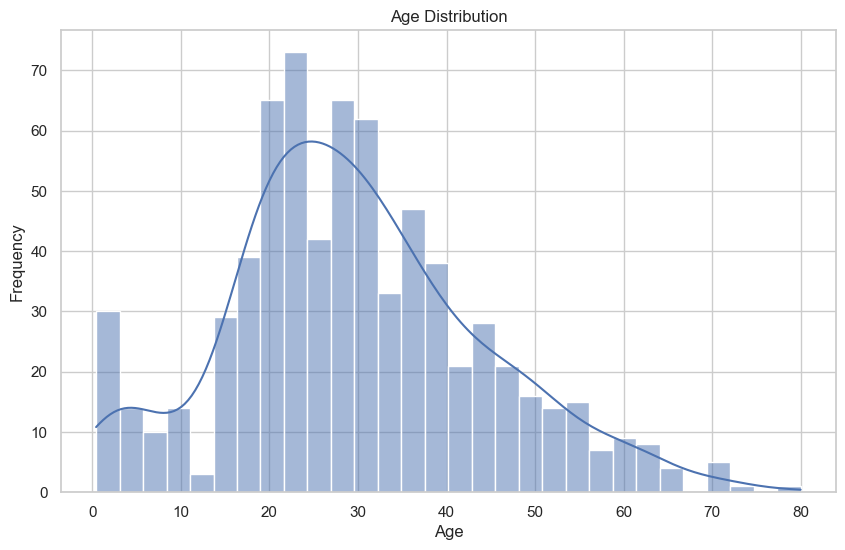

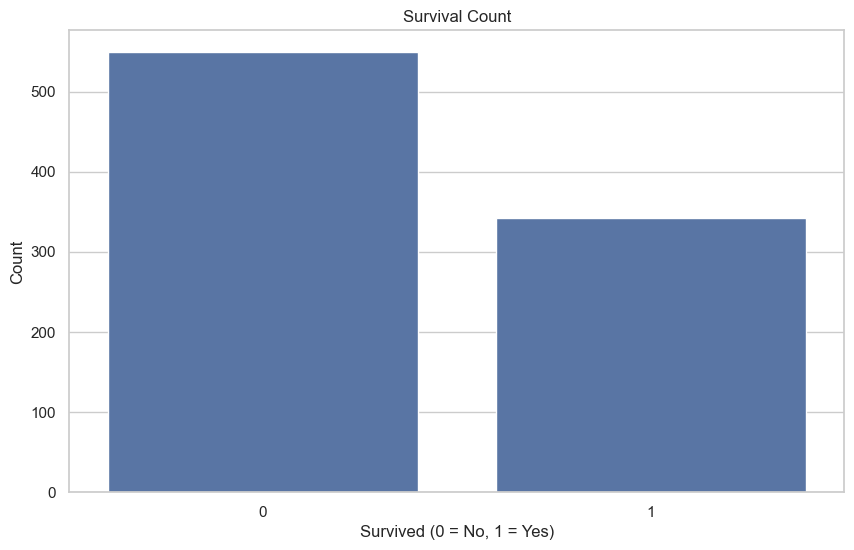

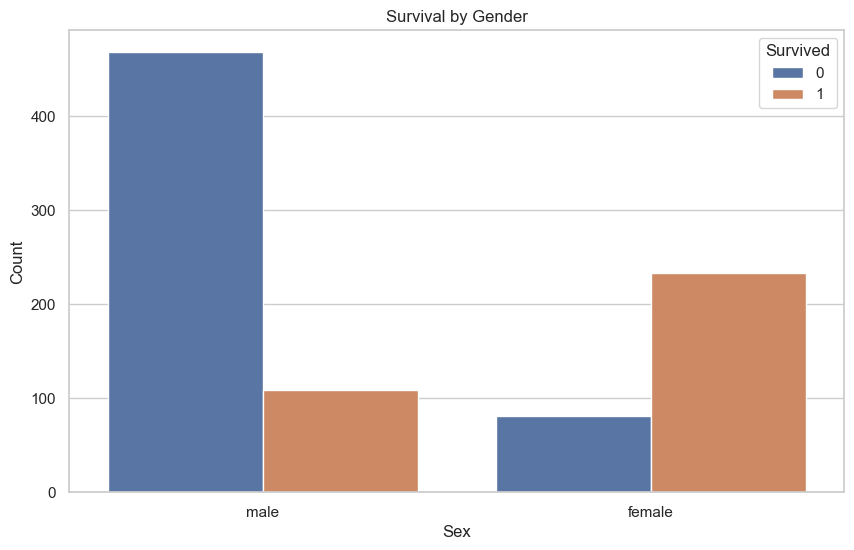

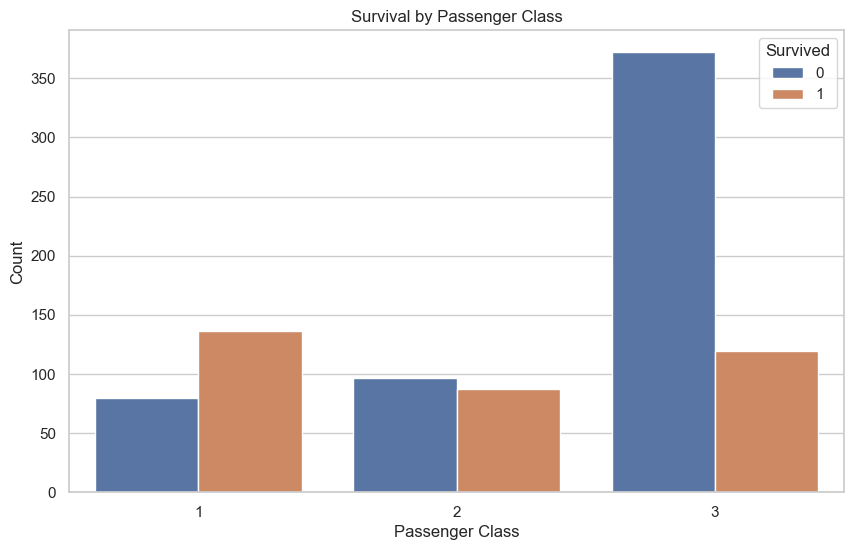

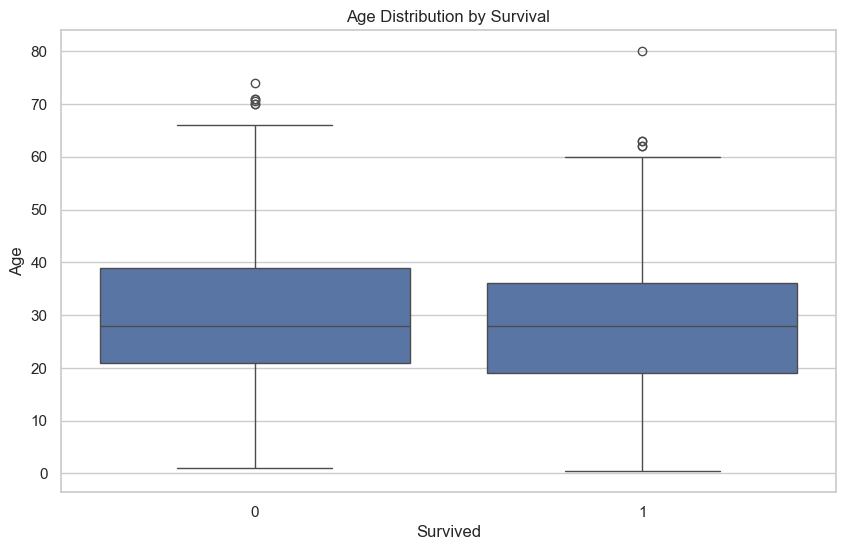

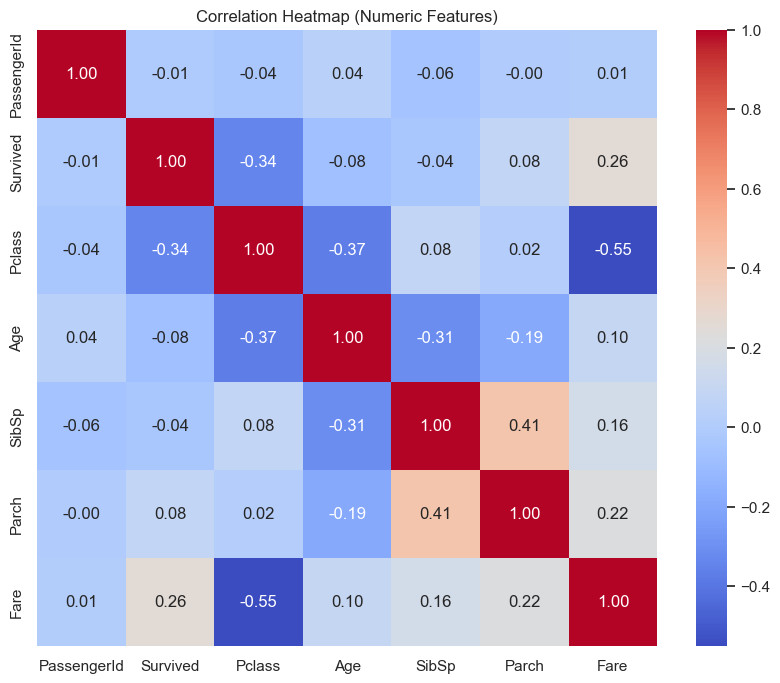

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())

plt.figure()
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure()
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

plt.figure()
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [94]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df['TrainFlag'] = 1
test_df['TrainFlag'] = 0
test_df['Survived'] = np.nan

full_data = pd.concat([train_df, test_df], sort=False)

#missing values

full_data['Embarked'] = full_data['Embarked'].fillna(full_data['Embarked'].mode()[0])
full_data['Fare'] = full_data['Fare'].fillna(full_data['Fare'].median())
full_data['Age'] = full_data['Age'].fillna(full_data['Age'].median())
full_data = full_data.drop('Cabin', axis=1)

#extraction
full_data['Title'] = full_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

full_data['Title'] = full_data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

#categorical
full_data = pd.get_dummies(full_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

#dropping
full_data = full_data.drop(['Name', 'Ticket'], axis=1)

#recovery
train_cleaned = full_data[full_data['TrainFlag'] == 1].drop(['TrainFlag'], axis=1)
test_cleaned = full_data[full_data['TrainFlag'] == 0].drop(['TrainFlag', 'Survived'], axis=1)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

test_ids = test_cleaned['PassengerId']

#training split: 80% train, 20% val
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

#iterations
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_split, y_train_split)

#Evaluation
y_val_pred = log_reg.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

#Prediction
test_predictions = log_reg.predict(X_test).astype(int)
test_ids = test_cleaned['PassengerId']

#submission
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': test_predictions
})
submission.to_csv("submission.csv", index=False)
print(submission.head())

Validation Accuracy: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       105
         1.0       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
